In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/emotion_dataset.csv")
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [ ]:
# Check a sample
print(df['Text'][0])


 Why ? 


In [ ]:
from sklearn.preprocessing import LabelEncoder


# Encode the emotion labels
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Emotion'])

# Define features and target
X = df['Clean_Text']
y = df['Label']

# Print label mapping
# Use a range of integers corresponding to the classes
label_map = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_map)

Label Mapping: {'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'neutral': 4, 'sadness': 5, 'shame': 6, 'surprise': 7}


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Remove or replace NaNs in Clean_Text
X = X.fillna("")
X_train = X_train.fillna("")
X_test = X_test.fillna("")


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the cleaned text
vectorizer = TfidfVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

       anger       0.64      0.52      0.57       860
     disgust       0.70      0.13      0.23       171
        fear       0.69      0.59      0.64      1082
         joy       0.56      0.82      0.67      2209
     neutral       0.68      0.35      0.47       451
     sadness       0.56      0.54      0.55      1345
       shame       0.82      0.48      0.61        29
    surprise       0.60      0.36      0.45       812

    accuracy                           0.59      6959
   macro avg       0.66      0.48      0.52      6959
weighted avg       0.61      0.59      0.58      6959



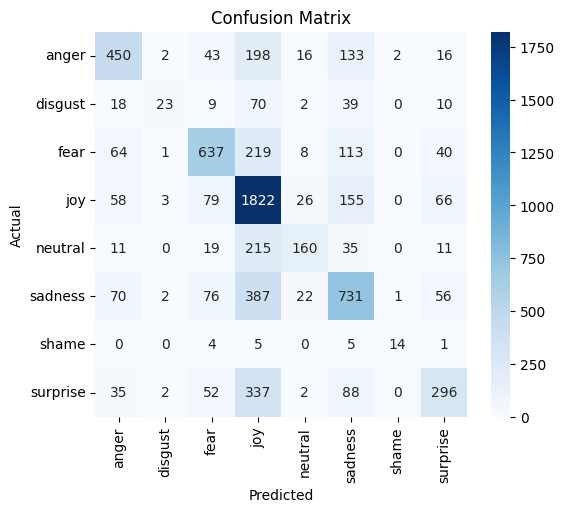

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data
y_pred = model.predict(X_test_vec)

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import joblib

joblib.dump(model, 'emotion_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

In [ ]:
# Define a function to predict emotion from text
def predict_emotion(text):
    """
    Predicts the emotion of a given text using the trained model and vectorizer.

    Args:
        text (str): The input text.

    Returns:
        str: The predicted emotion label.
    """
    # Ensure the input is a list for the vectorizer
    text_list = [text]

    # Vectorize the input text
    text_vec = vectorizer.transform(text_list)

    # Predict the label
    predicted_label_index = model.predict(text_vec)[0]

    # Decode the predicted label back to the emotion string
    predicted_emotion = label_encoder.inverse_transform([predicted_label_index])[0]

    return predicted_emotion

# Now you can call the function
print(predict_emotion("I am going to hit you!"))

joy


In [ ]:
import shutil
from google.colab import files

# shutil.make_archive("emotion_model", 'zip', "emotion_model") # Remove this line
shutil.make_archive("emotion_model", 'zip') # Archive the current directory
files.download('emotion_model.zip')

# shutil.make_archive("Diagnosis_Prediction_model", 'zip', "Diagnosis_Prediction_model")
# files.download('Diagnosis_Prediction_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>